In [1239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
from sklearn.metrics import mean_absolute_error

In [1240]:
df = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [1241]:
eda_df = df.copy()

In [1242]:
eda_df['month'] = 0
eda_df['hour'] = 0
eda_df['year'] = 0
eda_df['day'] = 0
eda_df['요일'] = 0

In [1243]:
eda_df.date_time = pd.to_datetime(eda_df.date_time)

In [1244]:
days = {0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일', 4: '금요일', 5: '토요일', 6: '일요일'}

In [1245]:
eda_df['month'] = eda_df.date_time.dt.month
eda_df['hour'] = eda_df.date_time.dt.hour
eda_df['year'] = eda_df.date_time.dt.year
eda_df['day'] = eda_df.date_time.dt.day
eda_df['요일'] = eda_df['date_time'].dt.weekday.map(days)

In [1246]:
input = eda_df.drop(['기온(°C)','풍속(m/s)','습도(%)','강수량(mm)','일조(hr)','비전기냉방설비운영','태양광보유','month'], axis=1)

In [1247]:
mean = pd.DataFrame(input.groupby(['num','요일','hour']).mean()['전력사용량(kWh)'])

In [1248]:
std = pd.DataFrame(input.groupby(['num','요일','hour']).std()['전력사용량(kWh)'])

In [1249]:
total_df = pd.merge(mean, std, how='inner', left_on = ['num','요일','hour'], right_on=['num','요일','hour'])

In [1250]:
total_df.reset_index(inplace=True)

In [1251]:
total_df.columns = ['num' ,'요일', 'hour', 'mean', 'std']

In [1252]:
def get_weekday_indices(index):
    datetime_index = pd.DatetimeIndex(index)
    weekday_indices = datetime_index[datetime_index.weekday < 5]
    return weekday_indices

In [1253]:
df_1 = df[df['num']==2]

In [1254]:
df_1.date_time = pd.to_datetime(df_1.date_time)

In [1255]:
df_1 = df_1.set_index(['date_time'])

In [1256]:
weekday = get_weekday_indices(df_1.index)

In [1257]:
input_1 = df_1.loc[weekday]

In [1258]:
input_1.reset_index(inplace=True)

In [1259]:
input_1['hour'] = input_1.date_time.dt.hour

In [1260]:
input_1

,date_time,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,hour
0,2020-06-01 00:00:00,2,977.184,18.3,2.5,94.0,0.0,0.0,1.0,0.0,0
1,2020-06-01 01:00:00,2,966.168,18.8,2.3,89.0,0.0,0.0,1.0,0.0,1
2,2020-06-01 02:00:00,2,972.972,19.0,3.2,86.0,0.0,0.0,1.0,0.0,2
3,2020-06-01 03:00:00,2,965.844,19.0,4.1,85.0,0.0,0.0,1.0,0.0,3
4,2020-06-01 04:00:00,2,971.676,18.9,3.9,87.0,0.0,0.0,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...
1459,2020-08-24 19:00:00,2,1353.348,27.9,1.7,83.0,0.0,0.6,1.0,0.0,19
1460,2020-08-24 20:00:00,2,1260.036,27.4,1.4,83.0,0.0,0.0,1.0,0.0,20
1461,2020-08-24 21:00:00,2,1214.028,27.1,1.4,86.0,0.0,0.0,1.0,0.0,21
1462,2020-08-24 22:00:00,2,1126.224,26.9,0.0,84.0,0.0,0.0,1.0,0.0,22


In [1261]:
train_data = input_1[:24*30].iloc[:,2]

In [1262]:
test_data = input_1[24*30:].iloc[:,2]

In [1263]:
from sklearn.ensemble import RandomForestRegressor

In [1264]:
input_1

,date_time,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,hour
0,2020-06-01 00:00:00,2,977.184,18.3,2.5,94.0,0.0,0.0,1.0,0.0,0
1,2020-06-01 01:00:00,2,966.168,18.8,2.3,89.0,0.0,0.0,1.0,0.0,1
2,2020-06-01 02:00:00,2,972.972,19.0,3.2,86.0,0.0,0.0,1.0,0.0,2
3,2020-06-01 03:00:00,2,965.844,19.0,4.1,85.0,0.0,0.0,1.0,0.0,3
4,2020-06-01 04:00:00,2,971.676,18.9,3.9,87.0,0.0,0.0,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...
1459,2020-08-24 19:00:00,2,1353.348,27.9,1.7,83.0,0.0,0.6,1.0,0.0,19
1460,2020-08-24 20:00:00,2,1260.036,27.4,1.4,83.0,0.0,0.0,1.0,0.0,20
1461,2020-08-24 21:00:00,2,1214.028,27.1,1.4,86.0,0.0,0.0,1.0,0.0,21
1462,2020-08-24 22:00:00,2,1126.224,26.9,0.0,84.0,0.0,0.0,1.0,0.0,22


In [1265]:
train_rf = input_1[:24*30]
test_rf = input_1[24*30:]

In [1266]:
train_rf['hour'] = train_rf.date_time.dt.hour
train_rf['month'] = train_rf.date_time.dt.month
train_rf['dayofweek'] = train_rf.date_time.dt.dayofweek

test_rf['hour'] = test_rf.date_time.dt.hour
test_rf['month'] = test_rf.date_time.dt.month
test_rf['dayofweek'] = test_rf.date_time.dt.dayofweek

In [1267]:
train_rf

,date_time,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,hour,month,dayofweek
0,2020-06-01 00:00:00,2,977.184,18.3,2.5,94.0,0.0,0.0,1.0,0.0,0,6,0
1,2020-06-01 01:00:00,2,966.168,18.8,2.3,89.0,0.0,0.0,1.0,0.0,1,6,0
2,2020-06-01 02:00:00,2,972.972,19.0,3.2,86.0,0.0,0.0,1.0,0.0,2,6,0
3,2020-06-01 03:00:00,2,965.844,19.0,4.1,85.0,0.0,0.0,1.0,0.0,3,6,0
4,2020-06-01 04:00:00,2,971.676,18.9,3.9,87.0,0.0,0.0,1.0,0.0,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2020-07-10 19:00:00,2,1221.804,22.6,2.6,93.0,0.0,0.1,1.0,0.0,19,7,4
716,2020-07-10 20:00:00,2,1145.988,22.2,1.1,94.0,0.0,0.0,1.0,0.0,20,7,4
717,2020-07-10 21:00:00,2,1104.840,22.2,2.9,95.0,0.0,0.0,1.0,0.0,21,7,4
718,2020-07-10 22:00:00,2,1051.704,21.8,2.1,96.0,0.0,0.0,1.0,0.0,22,7,4


In [1268]:
train_rf_x = train_rf.drop(['date_time', 'num', '전력사용량(kWh)'], axis=1)
test_rf_x = train_rf.drop(['date_time', 'num', '전력사용량(kWh)'], axis=1)

train_rf_y = train_rf['전력사용량(kWh)']
test_rf_y = test_rf['전력사용량(kWh)']

In [1269]:
from sklearn.preprocessing import MinMaxScaler

In [1270]:
mn_x = MinMaxScaler()
mn_y = MinMaxScaler()

In [1271]:
mn_x.fit(train_rf_x)
train_rf_x = mn_x.transform(train_rf_x)
test_rf_x = mn_x.transform(test_rf_x)

mn_y.fit(train_rf_y.values.reshape(-1,1))
train_rf_y = mn_y.transform(train_rf_y.values.reshape(-1,1))
test_rf_y = mn_y.transform(test_rf_y.values.reshape(-1,1))

In [1272]:
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [1273]:
params = {
    'n_estimators' : [5,50,100],
    'max_depth': [3,5,7],
    'min_samples_leaf':[4,6],
    'min_samples_split':[4,8,16]
}

In [1274]:
lg_params = {
    'n_estimators' : [5,10,15],
    'max_depth': [3,5,8],
    'learning_rate' : [0.01, 0.1, 0.3],
    'num_leaves' : [16, 32, 64]
}

In [1275]:
rf = RandomForestRegressor()
lg = LGBMRegressor(n_jobs = -1)

In [1276]:
train_rf_x

array([[0.1147541 , 0.21186441, 0.9375    , ..., 0.        , 0.        ,
        0.        ],
       [0.1557377 , 0.19491525, 0.875     , ..., 0.04347826, 0.        ,
        0.        ],
       [0.17213115, 0.27118644, 0.8375    , ..., 0.08695652, 0.        ,
        0.        ],
       ...,
       [0.43442623, 0.24576271, 0.95      , ..., 0.91304348, 1.        ,
        1.        ],
       [0.40163934, 0.1779661 , 0.9625    , ..., 0.95652174, 1.        ,
        1.        ],
       [0.45081967, 0.27118644, 0.9625    , ..., 1.        , 1.        ,
        1.        ]])

In [1277]:
grid_cv_lg = GridSearchCV(lg, param_grid=lg_params,
                      cv=3, n_jobs=2)
grid_cv_lg.fit(train_rf_x, train_rf_y)

grid_cv_rf = GridSearchCV(rf, param_grid=params,
                      cv=3, n_jobs=2)
grid_cv_rf.fit(train_rf_x, train_rf_y)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=2,
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [4, 6],
                         'min_samples_split': [4, 8, 16],
                         'n_estimators': [5, 50, 100]})

In [1278]:
from tensorflow.keras import layers, models

In [1279]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(train_rf_x.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [1280]:
dnn_his = model.fit(train_rf_x, train_rf_y, epochs=240, batch_size=24, verbose=0)

In [1281]:
ann_pred = model.predict(test_rf_x)

23/23 [==============================] - 0s 773us/step


In [1282]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential

In [1283]:
# LSTM 모델 정의
lstm_model = Sequential()
lstm_model.add(LSTM(128, input_shape=(train_rf_x.shape[1],1), return_sequences=True))
lstm_model.add(LSTM(256))
lstm_model.add(layers.Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [1284]:
lstm_his = lstm_model.fit(train_rf_x.reshape(-1,10,1), train_rf_y, epochs=240, batch_size=24, verbose=0)

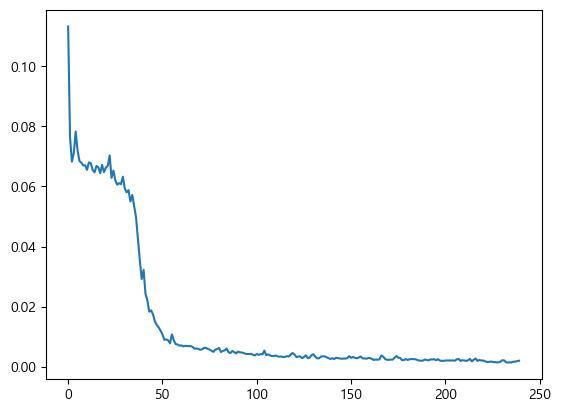

In [1285]:
plt.plot(lstm_his.history['loss'])

In [1286]:
from tqdm import tqdm

In [1287]:
model_mse = []
model_mae = []
model_mape = []
total_result = []
lstm_result = []
ann_result = []
lg_result = []
first = True

for i in tqdm(range(30)):
    if first:
        predictions_rf =  grid_cv_rf.best_estimator_.predict(test_rf_x[:24])
        predictions_lg = grid_cv_lg.best_estimator_.predict(test_rf_x[:24])
        predictions_ann = model.predict(test_rf_x[:24])
        predictions_lstm = lstm_model.predict(test_rf_x[:24].reshape(-1,10,1))
        first = False

    else:

        new_data_x = train_rf_x[: 24 * (i+1) + 30 * 24, :]
        new_data_y = train_rf_y[: 24 * (i+1) + 30 * 24]

        # 모델 학습
        grid_cv_rf.best_estimator_.fit(new_data_x, new_data_y)
        grid_cv_lg.best_estimator_.fit(new_data_x, new_data_y)
        model.fit(new_data_x, new_data_y, epochs=24, batch_size=24, verbose=0)
        lstm_model.fit(new_data_x.reshape(-1,10,1), new_data_y, epochs=24, batch_size=24, verbose=0)


        test_data_x = test_rf_x[24 * i: 24 * (i+1)]
        test_data_y = test_rf_y[24 * i: 24 * (i+1)]

        # 예측 수행
        predictions_rf = grid_cv_rf.best_estimator_.predict(test_data_x)
        predictions_lg = grid_cv_lg.best_estimator_.predict(test_data_x)
        predictions_ann = model.predict(test_data_x)
        predictions_lstm = lstm_model.predict(test_data_x.reshape(-1,10,1))

        # 오차 계산
        mae_rf = mean_absolute_error(test_data_y, predictions_rf)
        mae_lg = mean_absolute_error(test_data_y, predictions_lg)
        mae_ann = mean_absolute_error(test_data_y, predictions_ann)
        mae_lstm = mean_absolute_error(test_data_y, predictions_lstm)


        # 오차 저장
        model_mae.append([mae_rf, mae_lg, mae_ann, mae_lstm])
        
        # model_mape.append([mae_rf, mae_auto_arima])

    total_result.append([predictions_rf, predictions_lg, predictions_ann.reshape(1,-1)[0], predictions_lstm.reshape(1,-1)[0]])


  0%|          | 0/30 [00:00<?, ?it/s]

1/1 [==============================] - 0s 413ms/step


  3%|▎         | 1/30 [00:00<00:14,  2.05it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 18ms/step


  7%|▋         | 2/30 [00:08<02:24,  5.15s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 18ms/step


 10%|█         | 3/30 [00:17<02:58,  6.60s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 4/30 [00:25<03:09,  7.31s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 5/30 [00:33<03:11,  7.67s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 19ms/step


 20%|██        | 6/30 [00:42<03:09,  7.91s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 7/30 [00:50<03:05,  8.07s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 8/30 [00:59<02:59,  8.15s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 18ms/step


 30%|███       | 9/30 [01:07<02:52,  8.19s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 10/30 [01:15<02:45,  8.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 11/30 [01:24<02:37,  8.31s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 18ms/step


 40%|████      | 12/30 [01:32<02:29,  8.32s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 13/30 [01:40<02:21,  8.32s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 14/30 [01:49<02:13,  8.33s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 18ms/step


 50%|█████     | 15/30 [01:57<02:05,  8.35s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 16/30 [02:05<01:57,  8.36s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 17/30 [02:14<01:48,  8.33s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 19ms/step


 60%|██████    | 18/30 [02:22<01:39,  8.29s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 19/30 [02:30<01:31,  8.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 20/30 [02:38<01:22,  8.26s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 17ms/step


 70%|███████   | 21/30 [02:47<01:14,  8.26s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 22/30 [02:55<01:06,  8.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 17ms/step


 77%|███████▋  | 23/30 [03:03<00:57,  8.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 19ms/step


 80%|████████  | 24/30 [03:11<00:49,  8.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 25/30 [03:20<00:41,  8.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 19ms/step


 87%|████████▋ | 26/30 [03:28<00:33,  8.28s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 17ms/step


 90%|█████████ | 27/30 [03:36<00:24,  8.31s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 28/30 [03:45<00:16,  8.36s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 29/30 [03:53<00:08,  8.34s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
1/1 [==============================] - 0s 19ms/step


100%|██████████| 30/30 [04:02<00:00,  8.07s/it]


In [1288]:
grid_cv_rf.best_estimator_.fit(train_rf_x, train_rf_y)
grid_cv_lg.best_estimator_.fit(train_rf_x, train_rf_y)
model.fit(train_rf_x, train_rf_y, epochs=24, batch_size=24, verbose=0)
lstm_model.fit(train_rf_x.reshape(-1,10,1), train_rf_y,epochs=24, batch_size=24, verbose=0)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 293


[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] Start training from score 0.428154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [1289]:
train_rf_result = grid_cv_rf.best_estimator_.predict(train_rf_x)
train_lg_result = grid_cv_lg.best_estimator_.predict(train_rf_x)
train_ann_result = model.predict(train_rf_x)
train_lstm_result = lstm_model.predict(train_rf_x.reshape(-1,10,1))

23/23 [==============================] - 0s 773us/step


23/23 [==============================] - 0s 6ms/step


In [1290]:
from sklearn.linear_model import LinearRegression

In [1291]:
linear = LinearRegression()

In [1292]:
train_pred = np.array([train_rf_result, train_lg_result, train_ann_result.reshape(1,-1)[0], train_lstm_result.reshape(1,-1)[0]])

In [1293]:
linear.fit(train_pred.T, train_rf_y)

LinearRegression()

In [1294]:
linear.coef_

array([[0.0018751 , 0.0070666 , 0.40275639, 0.60079352]])

In [1295]:
rr = np.zeros([720,4])
for j in range(4):
    for i in range(30):
        rr[i*24:24*(i+1),j] = total_result[i][j]


In [1296]:
test_pred_result = linear.predict(rr)

[]

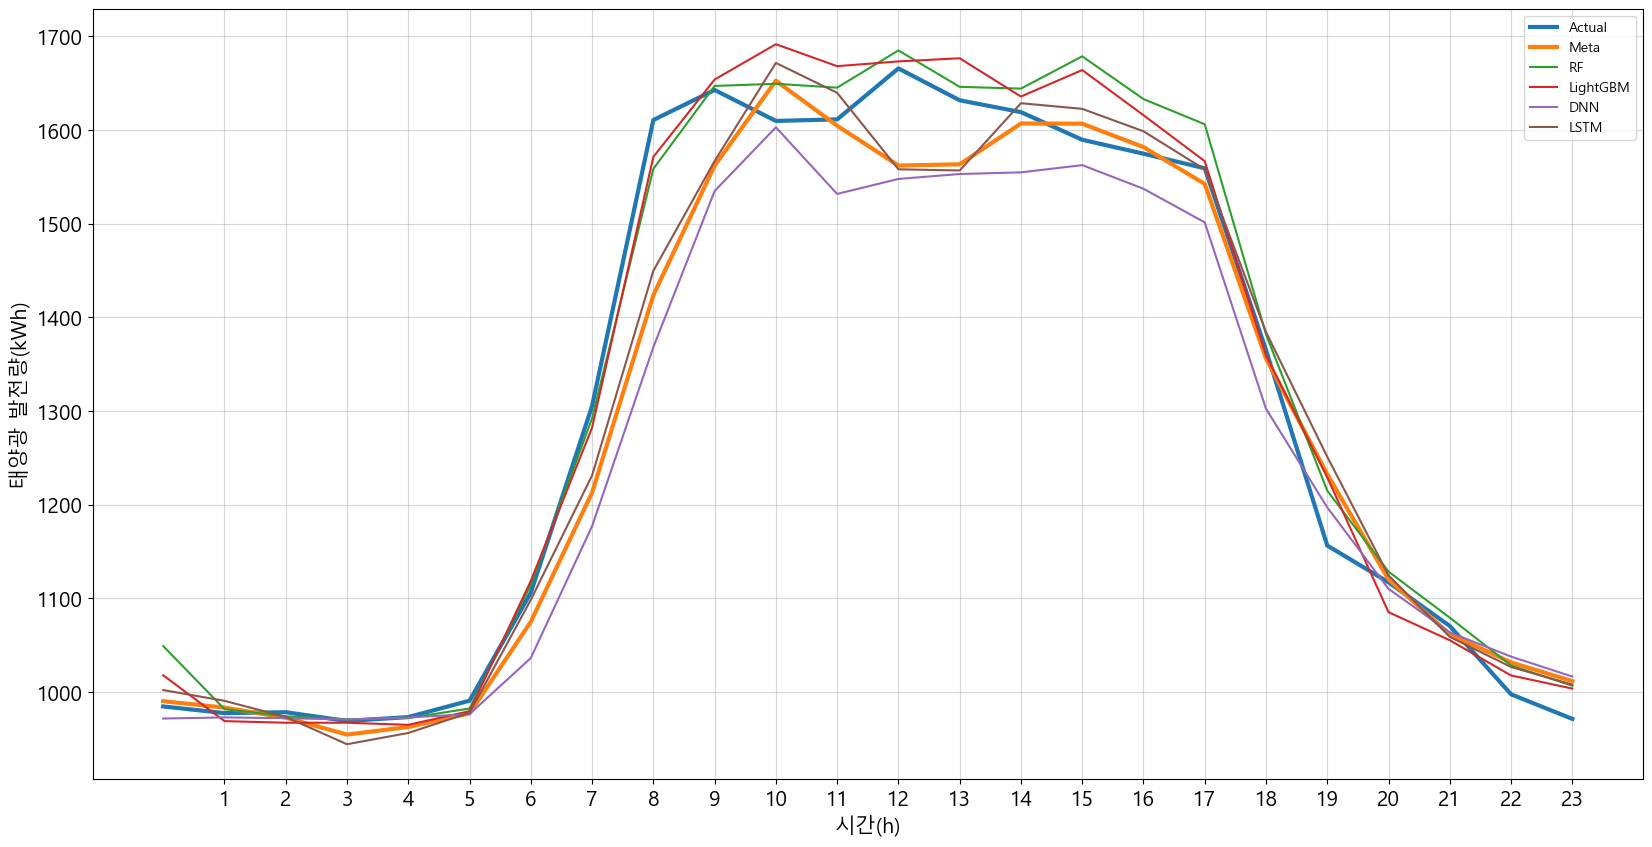

In [1316]:
k = 0
start = 24*k
end = 24*(k+1)

plt.figure(figsize=(20,10))
plt.plot(mn_y.inverse_transform(test_rf_y[start:end].reshape(-1,1)), label = 'Actual', linewidth = 3)
plt.plot(mn_y.inverse_transform(test_pred_result[start:end].reshape(-1,1)), label = 'Meta', linewidth = 3)
plt.plot(mn_y.inverse_transform(total_result[k][0].reshape(-1,1)), label = 'RF')
plt.plot(mn_y.inverse_transform(total_result[k][1].reshape(-1,1)), label = 'LightGBM')
plt.plot(mn_y.inverse_transform(total_result[k][2].reshape(-1,1)), label = 'DNN')
plt.plot(mn_y.inverse_transform(total_result[k][3].reshape(-1,1)), label = 'LSTM')
plt.xlabel('시간(h)', fontsize = 15)
plt.ylabel('전력 사용량(kWh)', fontsize = 15)
plt.xticks(range(1, end-start), fontsize = 15)  # 0-23시를 x축에 표시
plt.yticks(fontsize = 15)
plt.grid(True, alpha = 0.5)
plt.legend()
plt.plot()

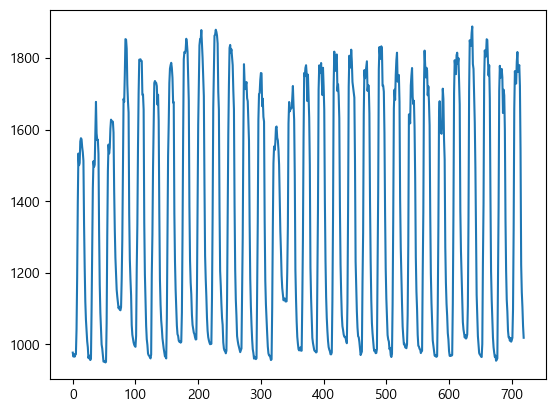

In [1325]:
plt.plot(mn_y.inverse_transform(train_rf_y))

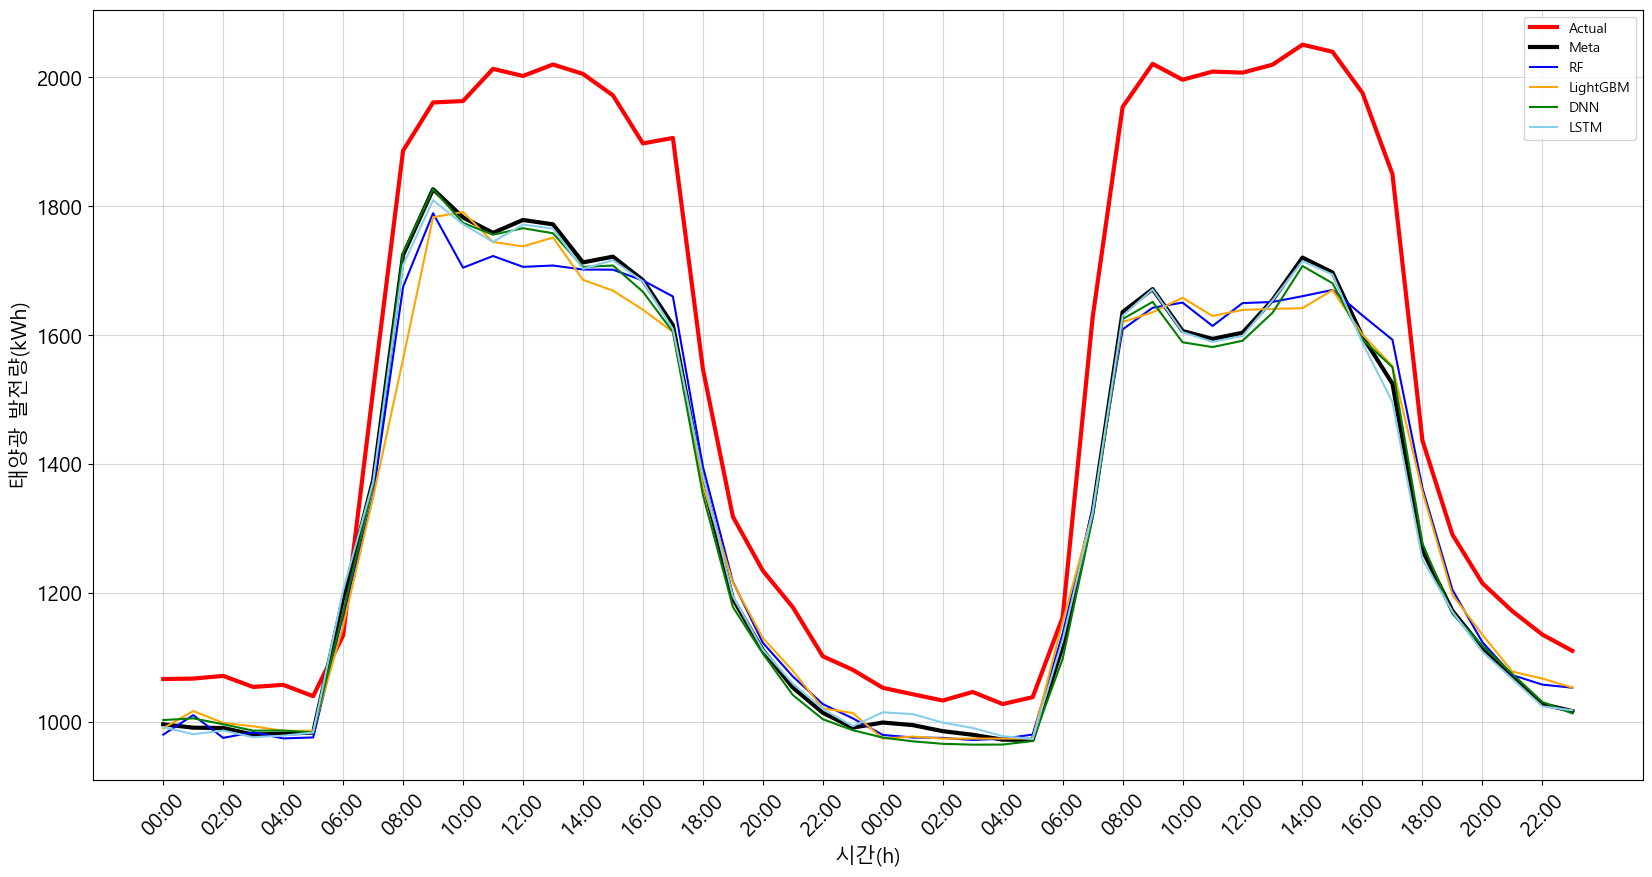

In [1326]:
k = 23
start_day_k = 24*k
end_day_k = 24*(k+1)
start_day_k_plus_1 = 24*(k+1)
end_day_k_plus_1 = 24*(k+2)

plt.figure(figsize=(20,10))

plt.plot(mn_y.inverse_transform(test_rf_y[start_day_k:end_day_k_plus_1].reshape(-1,1)), label='Actual', color = 'r', linewidth=3)
plt.plot(mn_y.inverse_transform(test_pred_result[start_day_k:end_day_k_plus_1].reshape(-1,1)), label='Meta', color = 'k', linewidth=3)

plt.plot(mn_y.inverse_transform(np.concatenate((total_result[k][0], total_result[k+1][0])).reshape(-1,1)), label='RF', color = 'blue')
plt.plot(mn_y.inverse_transform(np.concatenate((total_result[k][1], total_result[k+1][1])).reshape(-1,1)), label='LightGBM', color = 'orange')
plt.plot(mn_y.inverse_transform(np.concatenate((total_result[k][2], total_result[k+1][2])).reshape(-1,1)), label='DNN', color = 'g')
plt.plot(mn_y.inverse_transform(np.concatenate((total_result[k][3], total_result[k+1][3])).reshape(-1,1)), label='LSTM', color = 'skyblue')

plt.xlabel('시간(h)', fontsize=15)
plt.ylabel('전력 사용량(kWh)', fontsize=15)

time_labels = [f"{i%24:02d}:00" for i in range(start_day_k, end_day_k_plus_1, 2)]

plt.xticks(range(0, 48, 2), time_labels, fontsize=15, rotation=45)  
plt.yticks(fontsize=15)
plt.grid(True, alpha=0.5)
plt.legend()
plt.show()


In [1299]:
from math import *
import random
import sys

In [1300]:
class Particle:
    def __init__(self, max_iter, initial_position=None):
        if initial_position:  # If an initial position is provided
            self.position = initial_position.copy()
        else:
            self.position = [0.0]*4  # particle current position
        self.velocity = [random.uniform(-1, 1) for _ in range(4)]  # particle current velocity
        self.best_position = [0.0]*4  # particle best position
        self.fitness = sys.maxsize   # particle fitness
        self.best_fitness = sys.maxsize  # particle best fitness
        self.iteration = 0  # iteration count
        self.max_iter = max_iter

    def evaluate_fitness(self, fitness_func):
        self.fitness = fitness_func(self.position)
        if self.fitness < self.best_fitness:
            self.best_position = self.position.copy()
            self.best_fitness = self.fitness

    def update_velocity(self, global_best_position):
        w_min = 0.5
        w_max = 1
        self.iteration += 1
        w = w_max - ((w_max - w_min) * self.iteration / self.max_iter)
        c1 = 1
        c2 = 1.5
        for i in range(len(self.position)):
            r1 = random.random()
            r2 = random.random()
            cognitive_velocity = c1 * r1 * (self.best_position[i] - self.position[i])
            social_velocity = c2 * r2 * (global_best_position[i] - self.position[i])
            self.velocity[i] = w * self.velocity[i] + cognitive_velocity + social_velocity

    def update_position(self, bounds):
        for i in range(len(self.position)):
            self.position[i] += self.velocity[i]
            if self.position[i] < bounds[i][0]:
                self.position[i] = bounds[i][0]
            elif self.position[i] > bounds[i][1]:
                self.position[i] = bounds[i][1]

class PSO:
    def __init__(self, fitness_function, bounds, num_particles, max_iter, initial_positions=None):
        self.fitness_func = fitness_function
        self.bounds = bounds
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.global_best_position = [0.0]*4
        self.global_best_fitness = sys.maxsize
        if initial_positions:
            self.swarm = [Particle(max_iter, initial_position=pos) for pos in initial_positions]
        else:
            self.swarm = [Particle(max_iter) for _ in range(num_particles)]

    def run_result(self):
        for i in range(self.max_iter):
            for j in range(self.num_particles):
                self.swarm[j].evaluate_fitness(self.fitness_func)
                if self.swarm[j].fitness < self.global_best_fitness:
                    self.global_best_position = self.swarm[j].position.copy()
                    self.global_best_fitness = self.swarm[j].fitness
            for j in range(self.num_particles):
                self.swarm[j].update_velocity(self.global_best_position)
                self.swarm[j].update_position(self.bounds)
        return self.global_best_position, self.global_best_fitness

In [1301]:
def fitness_function(x, train_predictions_array, y_train):
    fitness = 0
    for i in range(4):
        fitness += train_predictions_array[:,i] * x[i]
    difference = y_train - fitness
    return np.sum(difference**2)

In [1302]:
weights = np.array([1 for i in range(24)])

def weighted_fitness_function(x, train_predictions_array, y_train, weights):
    fitness = 0
    for i in range(4):
        fitness += train_predictions_array[:,i] * x[i]
    difference = y_train - fitness
    num_repeats = len(difference) // len(weights)
    extended_weights = np.tile(weights, num_repeats)
    weighted_difference = difference * extended_weights  # Corrected the weights shape here
    return np.sum(weighted_difference**2)


In [1303]:
bound = [(-1,1) for _ in range(4)]

In [1304]:
pso_result = PSO(lambda x : weighted_fitness_function(x, train_pred.T, train_rf_y, weights),
                 bounds=bound,
                 num_particles=100,
                 max_iter=250)


In [1305]:
best_position, best_fitness = pso_result.run_result()

In [1306]:
best_position

[0.13098629676441884, 0.4990467208132948, 1.0, -1.0]

In [1307]:
aa = np.dot(rr, best_position)

[]

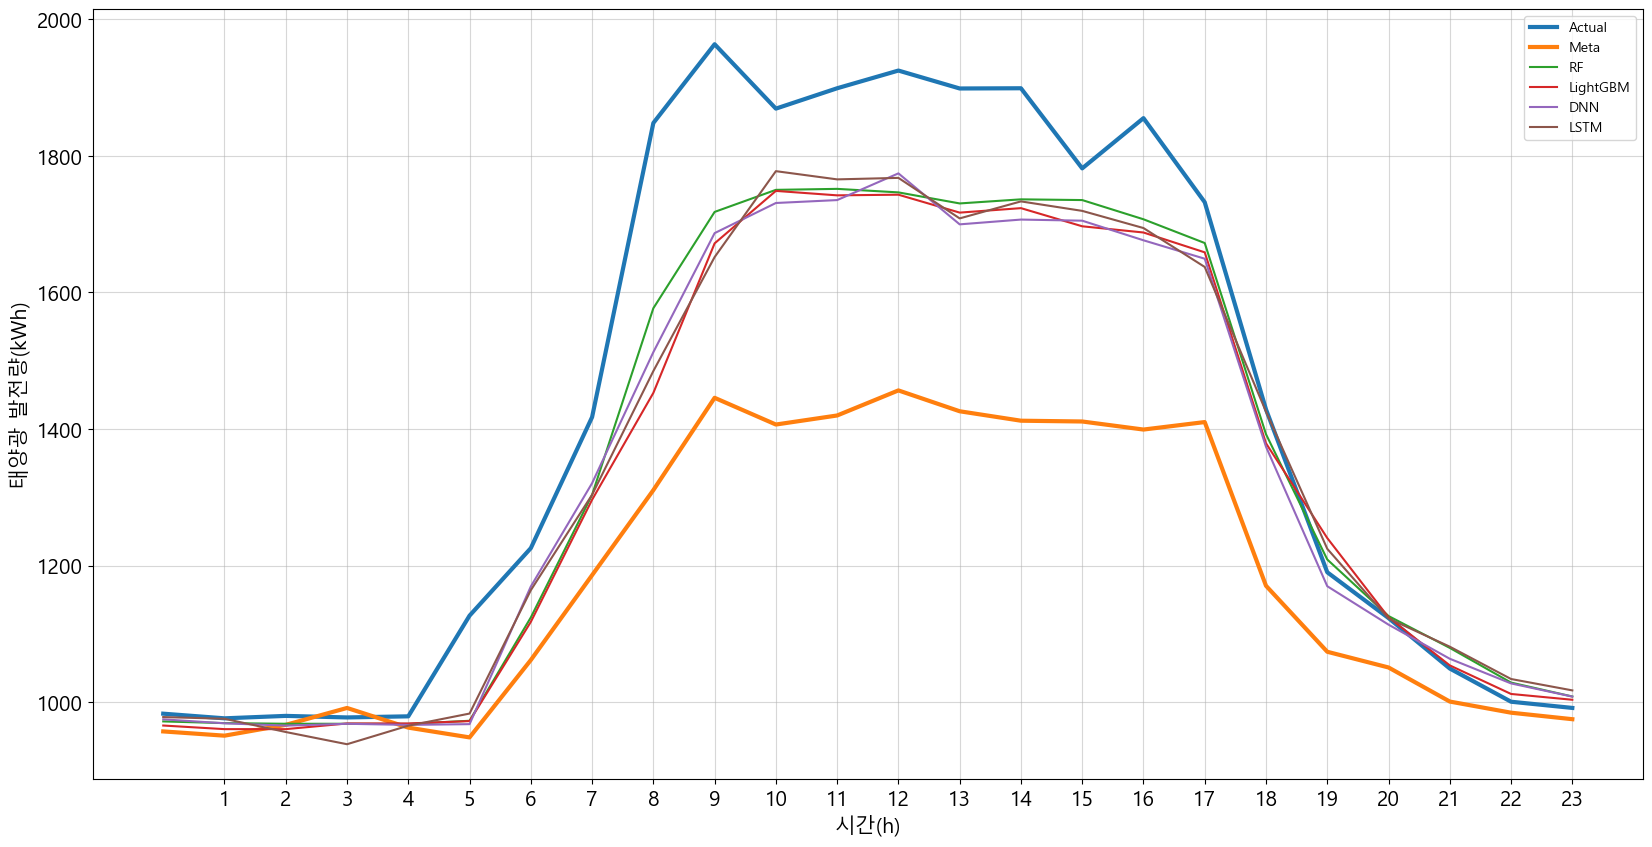

In [1318]:
k = 5
start = 24*k
end = 24*(k+1)

plt.figure(figsize=(20,10))
plt.plot(mn_y.inverse_transform(test_rf_y[start:end].reshape(-1,1)), label = 'Actual', linewidth = 3)
plt.plot(mn_y.inverse_transform(aa[start:end].reshape(-1,1)), label = 'Meta', linewidth = 3)
plt.plot(mn_y.inverse_transform(total_result[k][0].reshape(-1,1)), label = 'RF')
plt.plot(mn_y.inverse_transform(total_result[k][1].reshape(-1,1)), label = 'LightGBM')
plt.plot(mn_y.inverse_transform(total_result[k][2].reshape(-1,1)), label = 'DNN')
plt.plot(mn_y.inverse_transform(total_result[k][3].reshape(-1,1)), label = 'LSTM')
plt.xlabel('시간(h)', fontsize = 15)
plt.ylabel('전력 사용량(kWh)', fontsize = 15)
plt.xticks(range(1, end-start), fontsize = 15)  # 0-23시를 x축에 표시
plt.yticks(fontsize = 15)
plt.grid(True, alpha = 0.5)
plt.legend()
plt.plot()

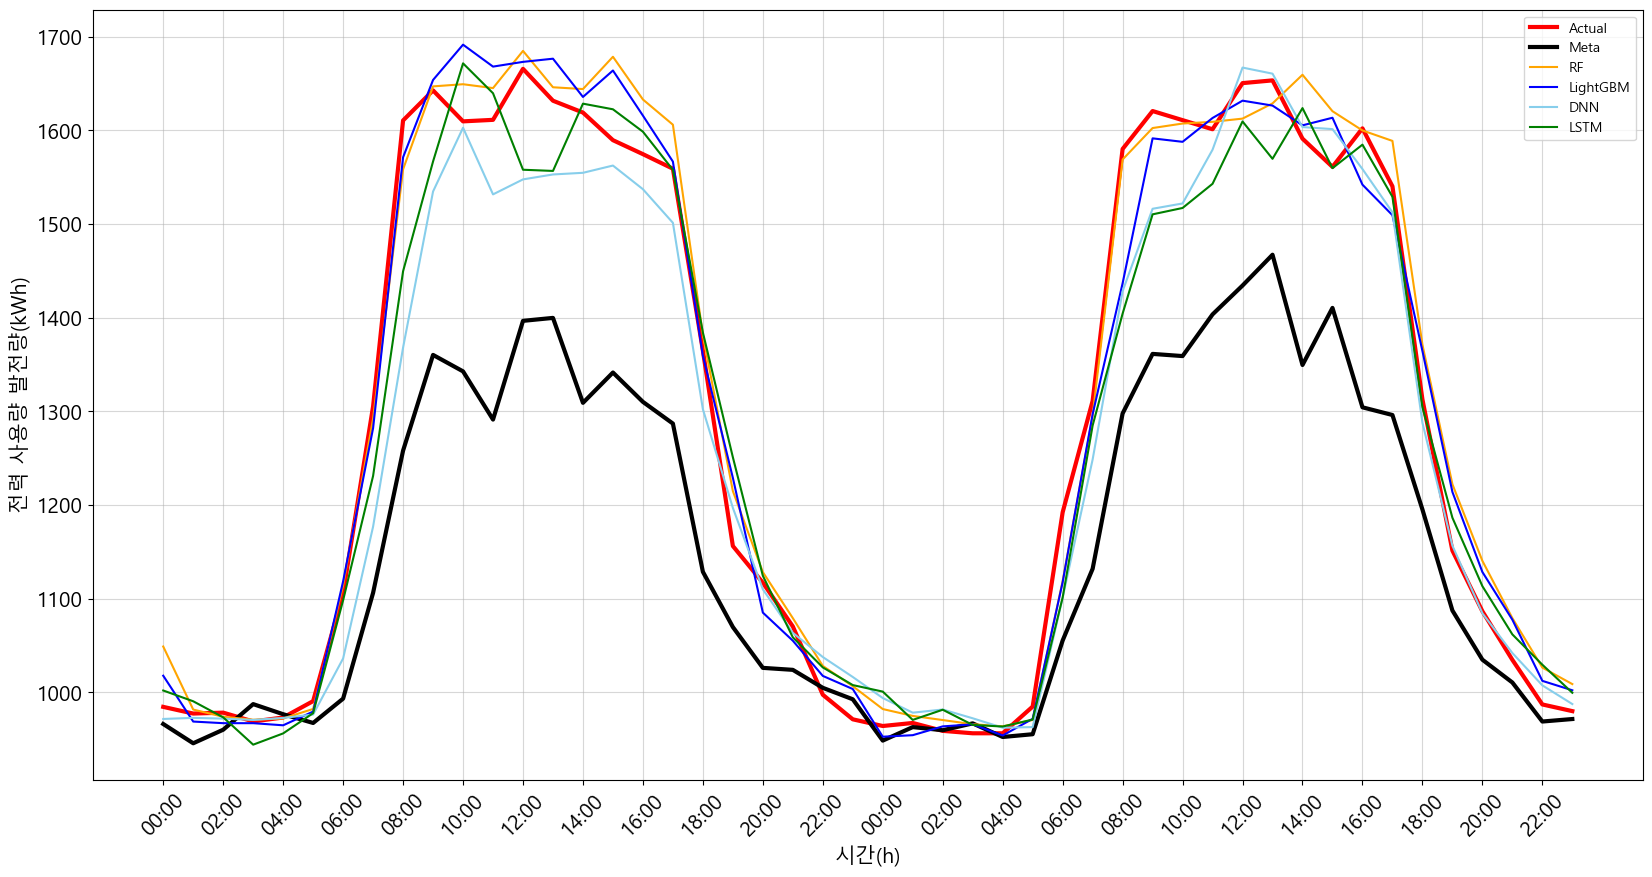

In [1327]:
k = 0
start_day_k = 24*k
end_day_k = 24*(k+1)
start_day_k_plus_1 = 24*(k+1)
end_day_k_plus_1 = 24*(k+2)

plt.figure(figsize=(20,10))

plt.plot(mn_y.inverse_transform(test_rf_y[start_day_k:end_day_k_plus_1].reshape(-1,1)), label='Actual', color = 'r', linewidth=3)
plt.plot(mn_y.inverse_transform(aa[start_day_k:end_day_k_plus_1].reshape(-1,1)), label='Meta', color = 'k',linewidth=3)

plt.plot(mn_y.inverse_transform(np.concatenate((total_result[k][0], total_result[k+1][0])).reshape(-1,1)), color = 'orange', label='RF')
plt.plot(mn_y.inverse_transform(np.concatenate((total_result[k][1], total_result[k+1][1])).reshape(-1,1)), color = 'b', label='LightGBM')
plt.plot(mn_y.inverse_transform(np.concatenate((total_result[k][2], total_result[k+1][2])).reshape(-1,1)), color = 'skyblue', label='DNN')
plt.plot(mn_y.inverse_transform(np.concatenate((total_result[k][3], total_result[k+1][3])).reshape(-1,1)), color = 'g', label='LSTM')

plt.xlabel('시간(h)', fontsize=15)
plt.ylabel('전력 사용량(kWh)', fontsize=15)

time_labels = [f"{i%24:02d}:00" for i in range(start_day_k, end_day_k_plus_1, 2)]

plt.xticks(range(0, 48, 2), time_labels, fontsize=15, rotation=45)  
plt.yticks(fontsize=15)
plt.grid(True, alpha=0.5)
plt.legend()
plt.show()
